In [1]:
from utils.self_preference_analyzer import Config, AnalyzeDataLoader, PlotUtils, QualitativeEvaluator
import matplotlib.pyplot as plt 
import pandas as pd
import os

In [2]:
class ConceptAnalyzer:
    """Class for concept-based analysis and visualization."""
    
    def __init__(self, config: Config, plot_utils: PlotUtils):
        self.config = config
        self.plot_utils = plot_utils
    
    def plot_wins_by_concept(self, df: pd.DataFrame, experiment_type: str = "all") -> None:
        """Plot wins by concept, sorted by Cultural Relevant Wins percentage."""
        # Filter and group data
        if experiment_type == "all":
            grouped_df = df.groupby('concept')[self.config.WIN_TYPES].sum()
        else:
            filtered_df = df[df['experiment'] == experiment_type]
            grouped_df = filtered_df.groupby('concept')[self.config.WIN_TYPES].sum()
        
        # Calculate percentages
        grouped_df = self.plot_utils.calculate_percentages(grouped_df, self.config.WIN_TYPES)
        
        # Sort by Cultural Relevant Wins percentage in descending order
        grouped_df = grouped_df.sort_values('Cultural Relevant Wins_percentage', ascending=True)
        
        # Create plot
        fig, ax = plt.subplots(figsize=self.config.FIGURE_SIZE)
        self.plot_utils.setup_stacked_bar_plot(
            ax, grouped_df,
            f'Percentage of Wins by Concept - Sorted by Cultural Relevant Wins ({experiment_type})',
            'Concept', self.config.WIN_TYPES, self.config.BAR_WIDTH,
            show_data_labels=False,
            # datalabel_rotaion=90
        )
        ax.set_xticklabels(grouped_df.index, rotation=90, fontsize=6)
    
        
        plt.tight_layout()
        plt.show()
    
    def plot_cultural_vs_nonrelevant_difference(self, df: pd.DataFrame, experiment_type: str = "all") -> None:
        """Plot the difference between Cultural Relevant Wins and Non-Relevant Wins by concept."""
        # Filter and group data
        if experiment_type == "all":
            grouped_df = df.groupby('concept')[self.config.WIN_TYPES].sum()
        else:
            filtered_df = df[df['experiment'] == experiment_type]
            grouped_df = filtered_df.groupby('concept')[self.config.WIN_TYPES].sum()
        
        # Calculate percentages
        grouped_df = self.plot_utils.calculate_percentages(grouped_df, self.config.WIN_TYPES)
        
        # Calculate Cultural Relevant - Non-Relevant difference
        grouped_df['Cultural_minus_NonRelevant'] = (
            grouped_df['Cultural Relevant Wins_percentage'] - 
            grouped_df['Non-Relevant Wins_percentage']
        )
        
        # Sort by difference in descending order
        grouped_df = grouped_df.sort_values('Cultural_minus_NonRelevant', ascending=False)
        
        # Create plot
        fig, ax = plt.subplots(figsize=self.config.FIGURE_SIZE)
        
        # Create bar plot with difference values
        bars = ax.bar(range(len(grouped_df)), grouped_df['Cultural_minus_NonRelevant'], 
                     color=['green' if x >= 0 else 'red' for x in grouped_df['Cultural_minus_NonRelevant']])
        
        # Add value labels on bars
        for i, (concept, row) in enumerate(grouped_df.iterrows()):
            diff_value = row['Cultural_minus_NonRelevant']
            ax.text(i, diff_value + (1 if diff_value >= 0 else -1), f'{diff_value:.1f}%', 
                   ha='center', va='bottom' if diff_value >= 0 else 'top', fontsize=6, rotation=90)
        
        # Customize plot
        ax.set_xlabel('Concept', fontsize=10)
        ax.set_ylabel('Cultural Relevant - Non-Relevant Wins (%)', fontsize=10)
        ax.set_title(f'Cultural vs Non-Relevant Wins Difference by Concept ({experiment_type})', fontsize=12)
        ax.set_xticks(range(len(grouped_df)))
        ax.set_xticklabels(grouped_df.index, rotation=90, fontsize=6)
        ax.grid(axis='y', alpha=0.3)
        ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
        ax.tick_params(axis='both', which='major', labelsize=8)
        
        plt.tight_layout()
        plt.show()

In [3]:
config = Config()
plot_utils = PlotUtils()
concept_analyzer = ConceptAnalyzer(config, plot_utils)

In [4]:
# Initialize data loader
data_loader = AnalyzeDataLoader(config)
dataframes = data_loader.prepare_data()

# Extract individual dataframes for easier access
concept_df = dataframes['concept']
country_df = dataframes['country'] 
overall_df = dataframes['overall']
language_df = dataframes['language']

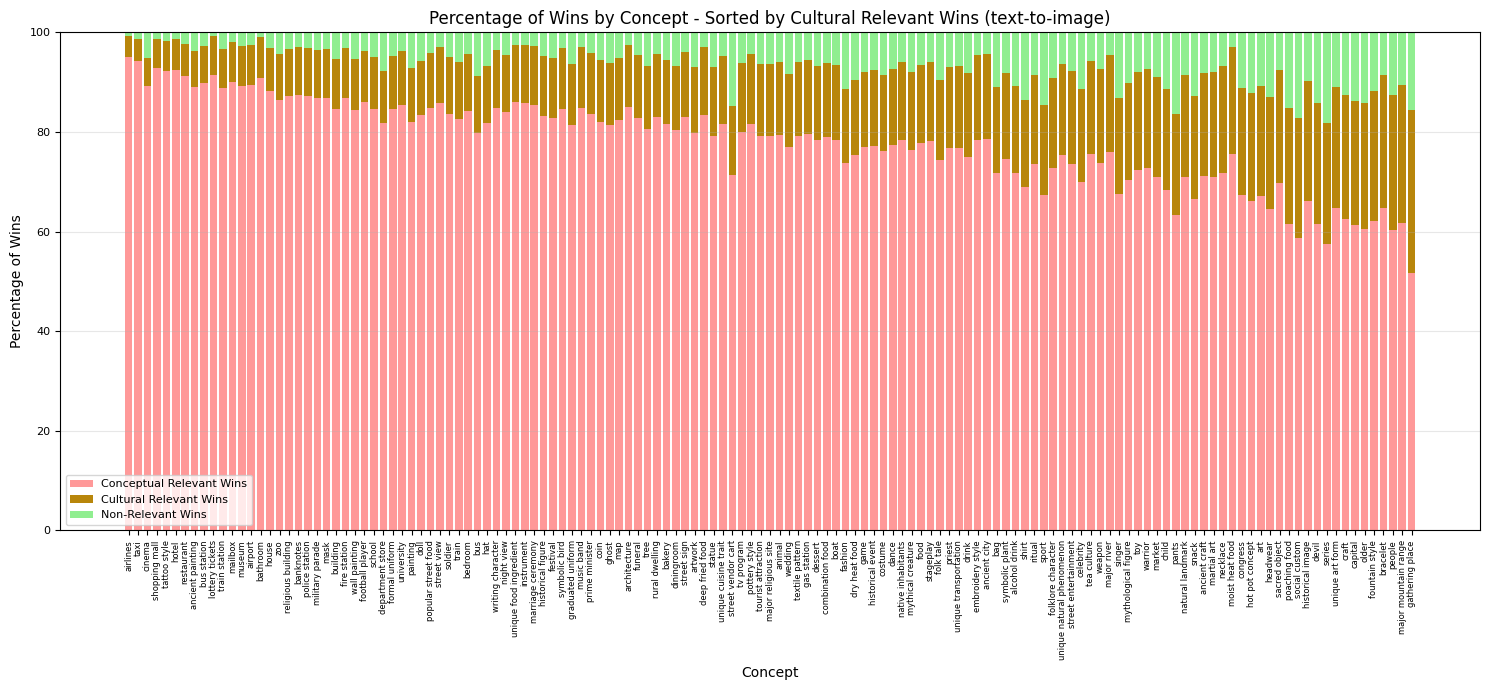

In [5]:
concept_analyzer.plot_wins_by_concept(concept_df, 'text-to-image')

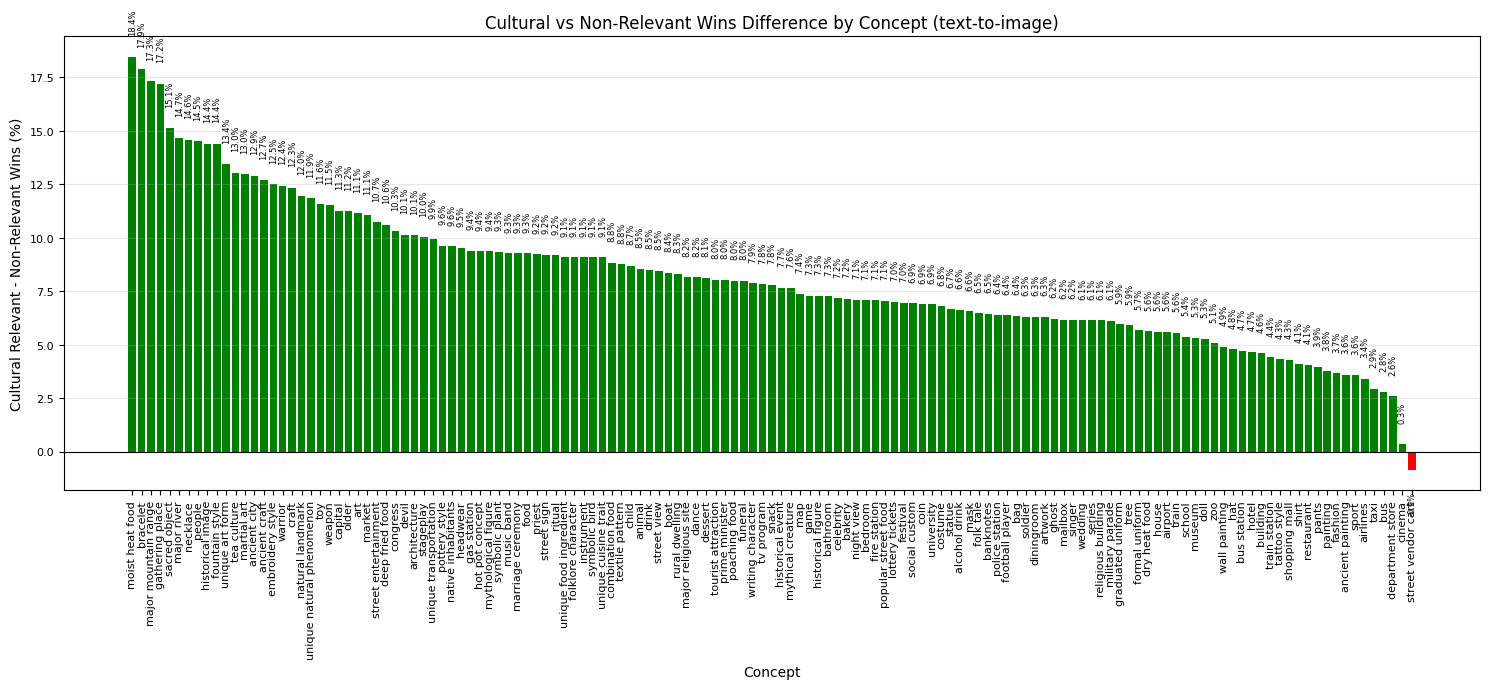

In [6]:
concept_analyzer.plot_cultural_vs_nonrelevant_difference(concept_df, 'text-to-image')

In [7]:
current_path = os.getcwd()
RAW_EVALUATION_FILENAME = "raw_evaluation_result_clip-vit-large-patch14.json"
RAW_EVALUATION_PATH = os.path.join(current_path, "evaluation_results", "benchmark-results", RAW_EVALUATION_FILENAME)
DATASET_PATH =  os.path.join(current_path, "datasets", "tierone003_deduplicated_and_renamed")

In [ ]:
# Initialize QualitativeEvaluator with the current dataset path and evaluation path
qualitative_evaluator = QualitativeEvaluator(config)
qualitative_evaluator.load_dataset(DATASET_PATH)
raw_result = qualitative_evaluator.load_raw_results(RAW_EVALUATION_PATH)


In [9]:
data_df = pd.DataFrame(qualitative_evaluator.dataset.remove_columns(['image']))

In [10]:
# Count unique concepts per country
concept_per_country = data_df.groupby('country')['concept'].nunique().sort_values(ascending=False)
print("Number of unique concepts per country:\n")
print(concept_per_country)

Number of unique concepts per country:

country
India           133
Japan           131
Germany         130
France          128
Spain           127
Nigeria         127
Brazil          126
China           126
Portugal        126
Argentina       125
Australia       123
Kenya           123
Thailand        123
UK              119
USA             119
Saudi Arabia    117
Name: concept, dtype: int64


In [11]:
# Nested Grouping: Count of unique concepts for each country
concept_per_country = data_df.groupby('country')['concept'].nunique().sort_values(ascending=False)
print("Number of unique concepts per country:\n")
print(concept_per_country)

Number of unique concepts per country:

country
India           133
Japan           131
Germany         130
France          128
Spain           127
Nigeria         127
Brazil          126
China           126
Portugal        126
Argentina       125
Australia       123
Kenya           123
Thailand        123
UK              119
USA             119
Saudi Arabia    117
Name: concept, dtype: int64


In [12]:
# Further nested grouping
concept_per_country_detail = data_df.groupby(['concept', 'country'])['image_id'].nunique()
print("\nDetailed breakdown of unique concepts per country:\n")
print(concept_per_country_detail.to_string())


Detailed breakdown of unique concepts per country:

concept                    country     
airlines                   Argentina        6
                           China            2
                           Germany          1
                           Japan            1
                           Kenya            1
                           Spain            7
                           UK               4
                           USA              2
airport                    Argentina        2
                           Australia        1
                           Brazil           9
                           China            4
                           France           5
                           Germany          2
                           India            8
                           Japan            4
                           Kenya            3
                           Nigeria          2
                           Portugal         5
                           Saudi 

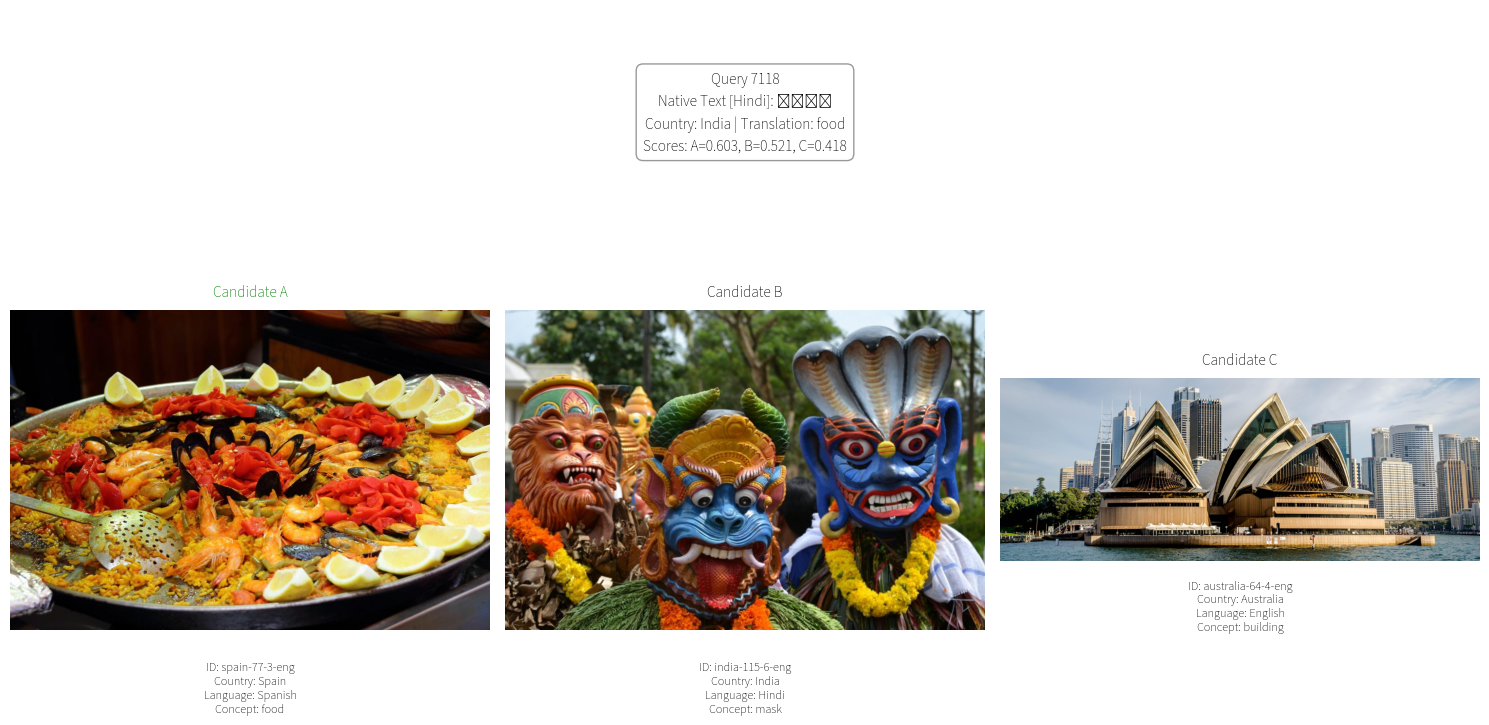

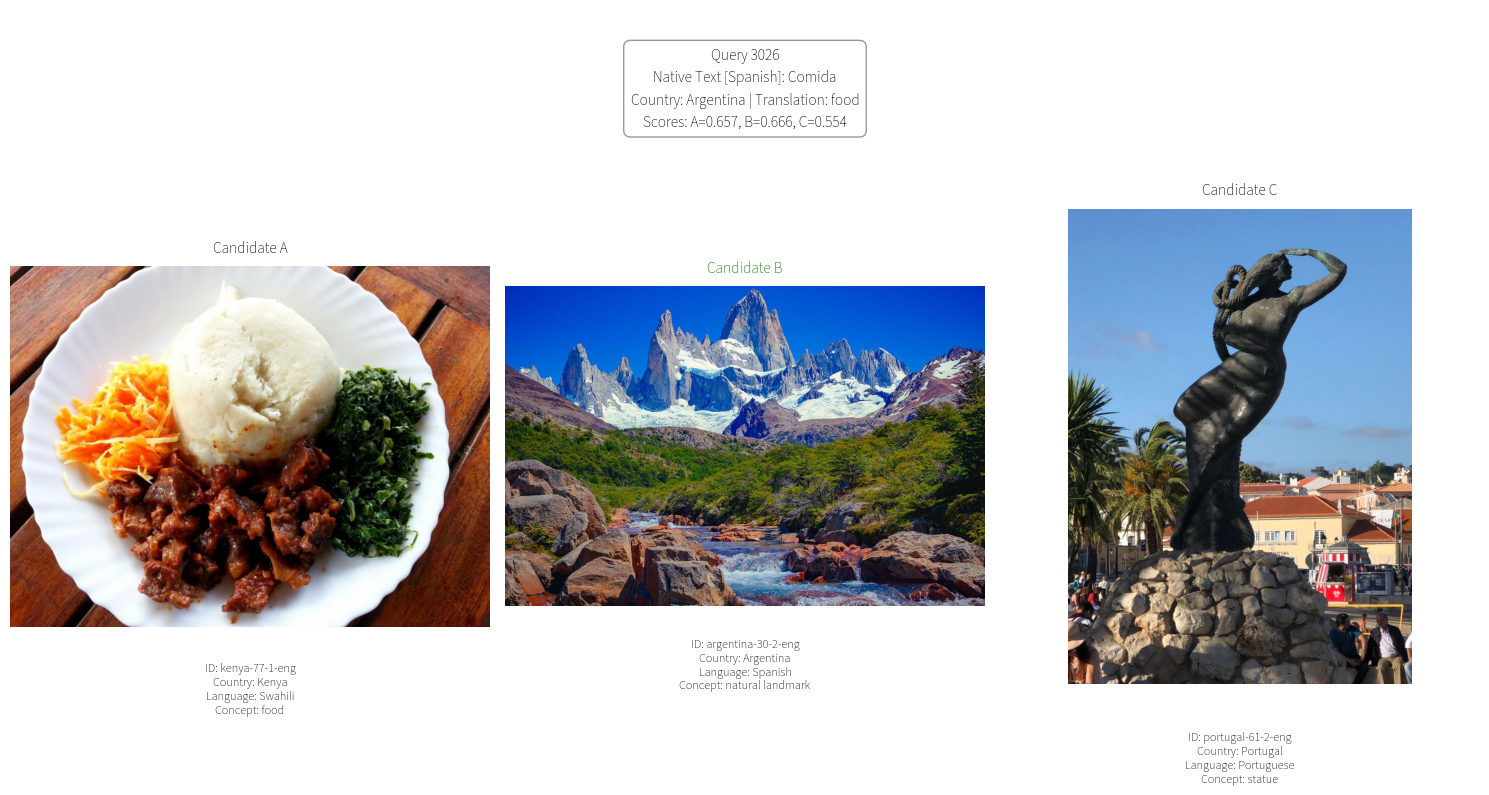

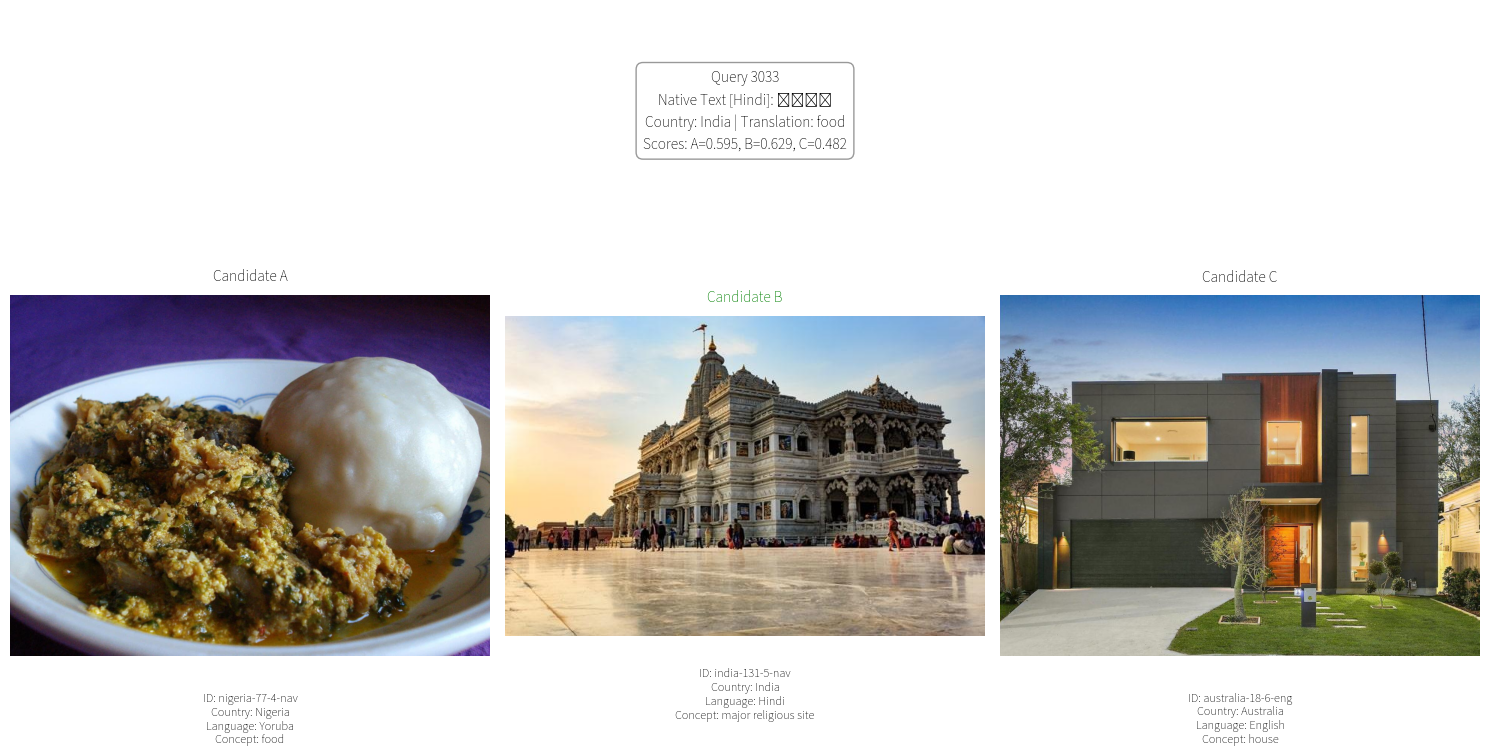

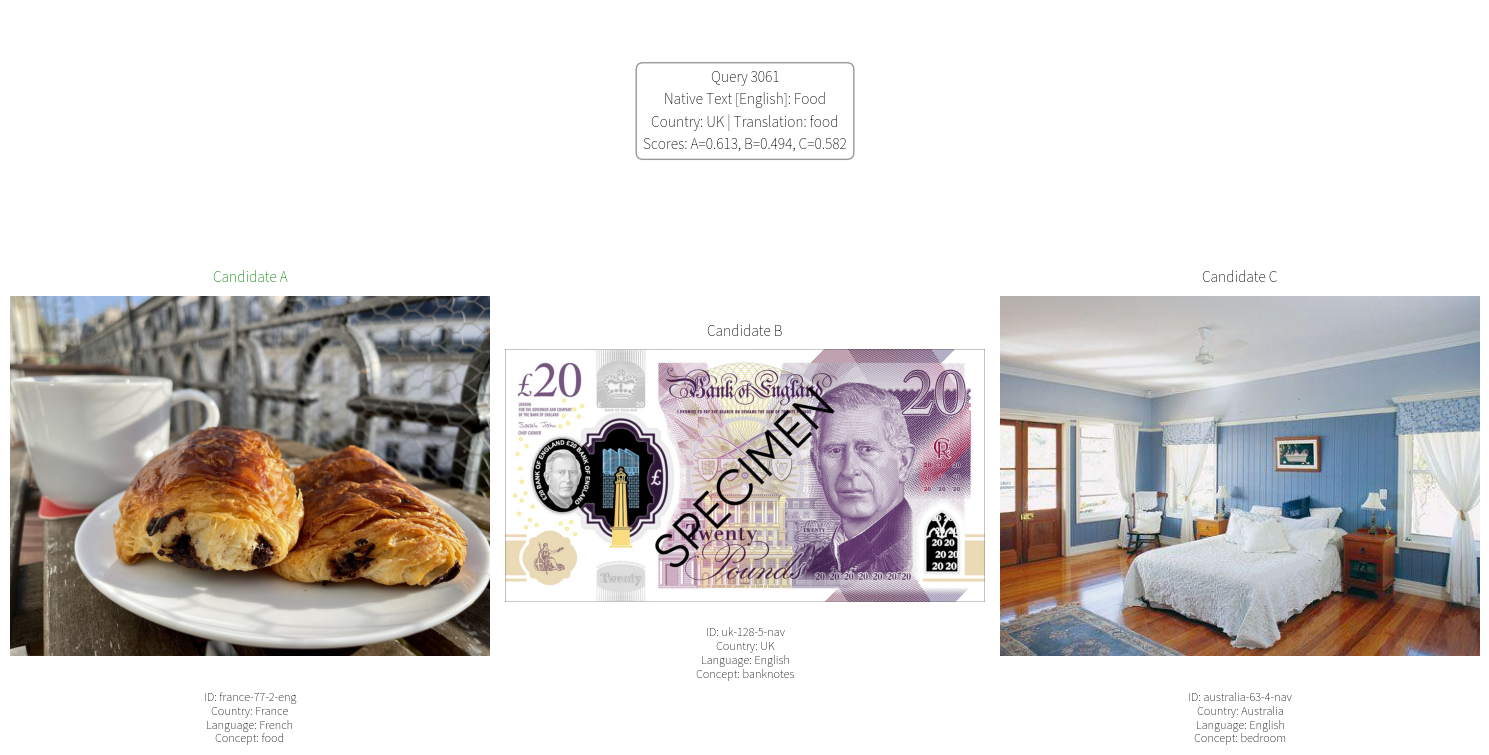

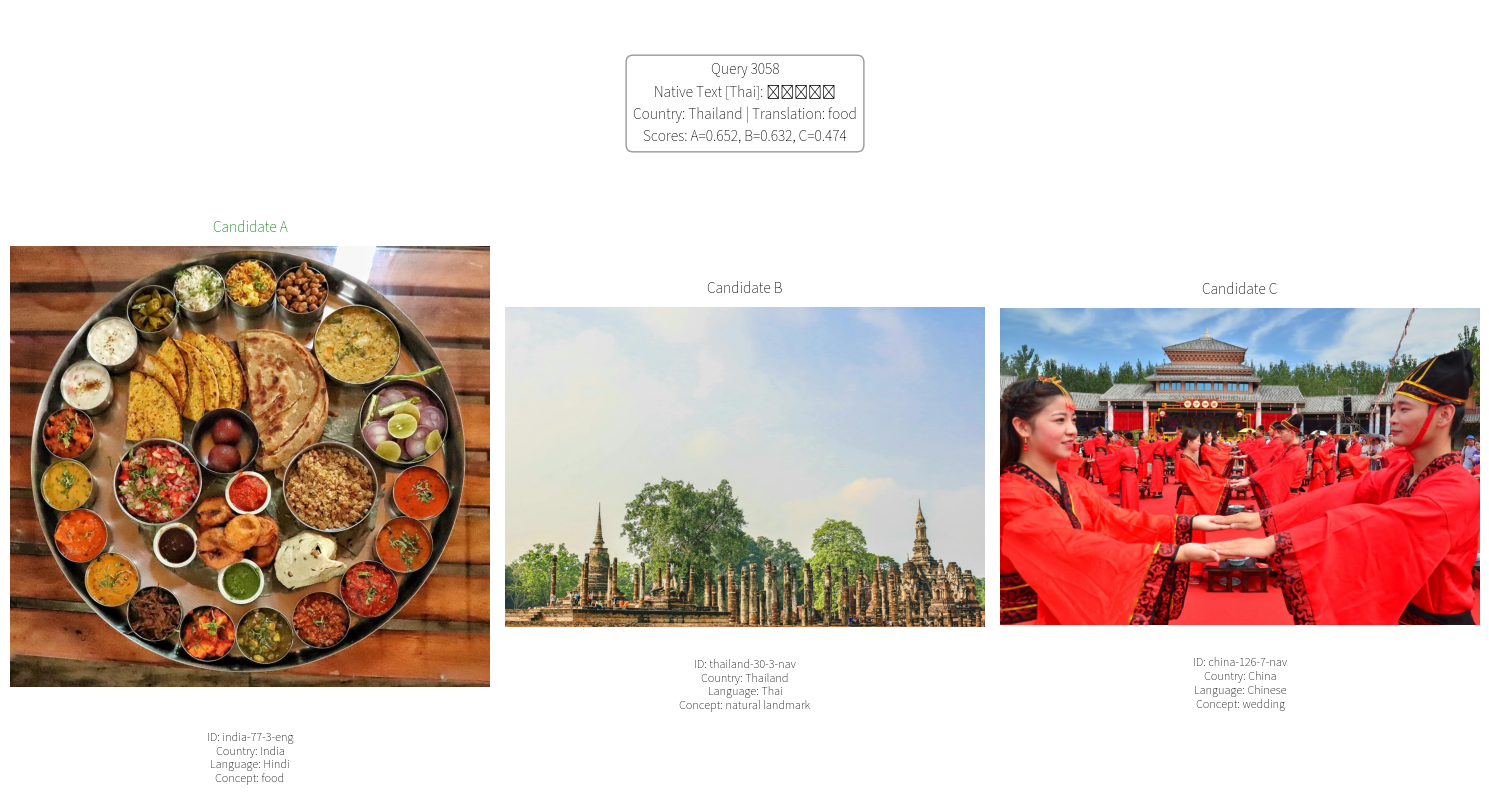

query_index      query_image_id query_concept query_country  \
7118       7118.0      india-77-8-nav          food         India   
3026       3026.0  argentina-77-5-eng          food     Argentina   
3033       3033.0      india-77-3-eng          food         India   
3061       3061.0         uk-77-1-eng          food            UK   
3058       3058.0   thailand-77-2-eng          food      Thailand   

      semantically_relevant_candidate_index  culturally_relevant_candidate_index  non_relevant_candidate_index  \
7118             3053.0             4246.0             2465.0   
3026             3036.0             1175.0             2356.0   
3033            11453.0             5320.0              688.0   
3061             3030.0            10960.0            10755.0   
3058             3033.0             6738.0             8417.0   

     semantically_relevant_candidate_image_id culturally_relevant_candidate_image_id non_relevant_candidate_image_id  \
7118       spain-77-3-eng      india-115-6-eng   australia-64-4-eng   
3026       kenya-77-1-eng   argentina-30-2-eng    portugal-61-2-eng   
3033     nigeria-77-4-nav      india-131-5-nav   australia-18-6-eng   
3061      france-77-2-eng         uk-128-5-nav   australia-63-4-nav   
3058       india-77-3-eng    thailand-30-3-nav      china-126-7-nav   

     semantically_relevant_candidate_concept   culturally_relevant_candidate_concept non_relevant_candidate_concept  \
7118                food                  mask            building   
3026                food      natural landmark              statue   
3033                food  major religious site               house   
3061                food             banknotes             bedroom   
3058                food      natural landmark             wedding   

     semantically_relevant_candidate_country culturally_relevant_candidate_country non_relevant_candidate_country   score_a  \
7118               Spain               India           Australia  0.603003   
3026               Kenya           Argentina            Portugal  0.657432   
3033             Nigeria               India           Australia  0.595346   
3061              France                  UK           Australia  0.612538   
3058               India            Thailand               China  0.651946   

       score_b   score_c winner  
7118  0.521067  0.417663      a  
3026  0.666226  0.553551      b  
3033  0.628757  0.482492      b  
3061  0.494413  0.582383      a  
3058  0.632293  0.473849      a

In [13]:
qualitative_evaluator.show_sample_raw_results(raw_result, query_concept="food")